In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from library.constants import *
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix

In [2]:
color=["#332288","#117733","#44AA99","#88CCEE","#DDCC77","#CC6677"]
# color=['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000','#6C8E80']
# color=sns.color_palette()

+ Figure 12: Impact on the performance of the pre-trained model with newly annotated data -(a) City-1 (b) City-2

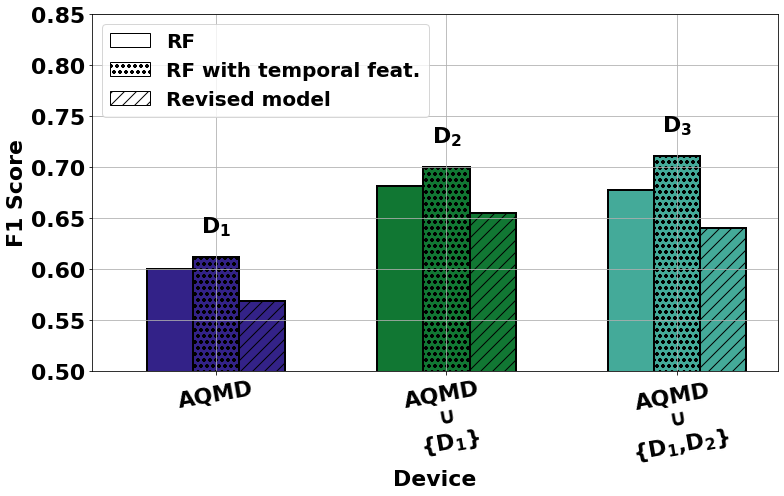

In [3]:
#Durgapur (a)
rf_aug_old=pd.read_csv("./logs/exp/dgp_rf_old_aug.csv")["f1_score_test"] #RF OLD
rf_aug=pd.read_csv("./logs/exp/dgp_rf_aug.csv")["f1_score_test"] #RF
rnn_aug=pd.read_csv("./logs/exp/dgp_rnn_aug.csv")["f1_score_test"] #RNN

xlabel=[]
for n in [1,2,3]:
    D=""
    for d in range(1,n):
        D+="$\mathbf{"+f"D_{d}"+"}$,"
    if n==1:
        xlabel.append("AQMD")
        continue
    xlabel.append("AQMD\n$\mathbf{\cup}$\n{"+D[:-1]+"}")
    
def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i+1, y[i], x[i], fontdict=dict(size=fontsize),ha = 'center')

fig, ax = plt.subplots(figsize=figsize)
#RF OLD
ax.bar(x=np.array([1,2,3])-0.2,height=rf_aug_old,align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,
       error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3))

#RF
ax.bar(x=np.array([1,2,3]),height=rf_aug,align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='oo',
       error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3))
#RNN
ax.bar(x=np.array([1,2,3])+0.2,height=rnn_aug,align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='//',
       error_kw =dict(linestyle='-',linewidth=3.0, color='black',markeredgewidth=3))

ax.set_ylim(0.5,0.85)
#ax.set_xlim(-0.5,4.5)

ax.set_xlabel("Device",fontsize=fontsize, fontweight='bold')
ax.set_ylabel("F1 Score",fontsize=fontsize, fontweight='bold')

ax.set_xticks([1,2,3])
ax.set_xticklabels(xlabel,rotation=10,fontsize=fontsize, fontweight='bold')
plt.yticks(fontsize=fontsize, fontweight='bold')
addlabels(["$\mathbf{D_"+f"{i}"+"}$\n" for i in range(1,4)],np.max([rf_aug_old.values,rf_aug.values,
                                                                    rnn_aug.values],axis=0))

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch="oo")
plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper left',prop=dict(size=fontsize-2,weight="bold"))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_aug.png")

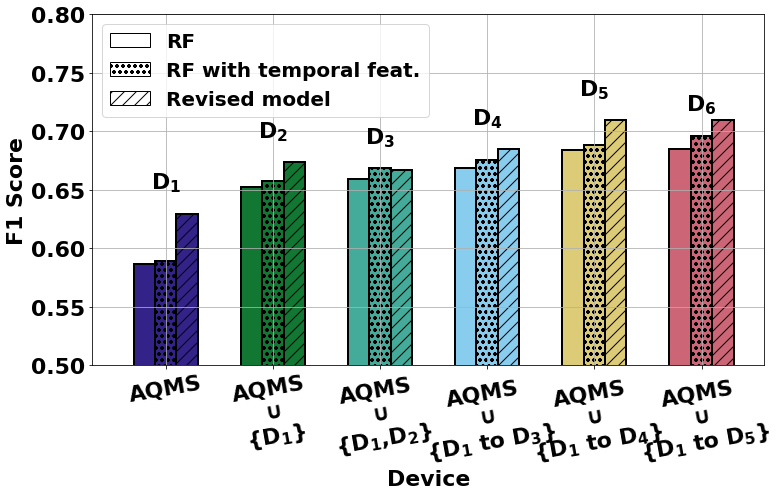

In [4]:
#Delhi (b)
rf_aug_old=pd.read_csv("./logs/exp/delhi_rf_old_aug.csv")["f1_score_test"] #RF OLD
rf_aug=pd.read_csv("./logs/exp/delhi_rf_aug.csv")["f1_score_test"] #RF
rnn_aug=pd.read_csv("./logs/exp/delhi_rnn_aug.csv")["f1_score_test"] #RNN

xlabel=\
['AQMS',
 'AQMS\n$\\mathbf{\\cup}$\n{$\\mathbf{D_1}$}',
 'AQMS\n$\\mathbf{\\cup}$\n{$\\mathbf{D_1}$,$\\mathbf{D_2}$}',
 'AQMS\n$\\mathbf{\\cup}$\n{$\\mathbf{D_1}$ to $\\mathbf{D_3}$}',
 'AQMS\n$\\mathbf{\\cup}$\n{$\\mathbf{D_1}$ to $\\mathbf{D_4}$}',
 'AQMS\n$\\mathbf{\\cup}$\n{$\\mathbf{D_1}$ to $\\mathbf{D_5}$}']

def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i+1, y[i], x[i], fontdict=dict(size=22),ha = 'center')

fig, ax = plt.subplots(figsize=figsize)
#RF OLD
ax.bar(x=np.array([1,2,3,4,5,6])-0.2,height=rf_aug_old,align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#RF
ax.bar(x=np.array([1,2,3,4,5,6]),height=rf_aug,align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))
#RNN
ax.bar(x=np.array([1,2,3,4,5,6])+0.2,height=list(rnn_aug)[:-1]+list([rnn_aug.values[-2]]), #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

ax.set_ylim(0.5,0.8)

ax.set_xlabel("Device",fontsize=fontsize, fontweight='bold')
ax.set_ylabel("F1 Score",fontsize=fontsize, fontweight='bold')

ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(xlabel,rotation=10,fontsize=fontsize, fontweight='bold')
plt.yticks(fontsize=fontsize, fontweight='bold')
addlabels(["$\mathbf{D_"+f"{i}"+"}$\n" for i in range(1,7)],np.max([rf_aug.values,rnn_aug.values],axis=0))

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper left',prop=dict(size=fontsize-2,weight="bold"))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_aug.png")

+ Figure 11: (a) Variation in F1-Score – (a) Count of AQMSs in City-2 (b) Volume of Bootstrapping Data

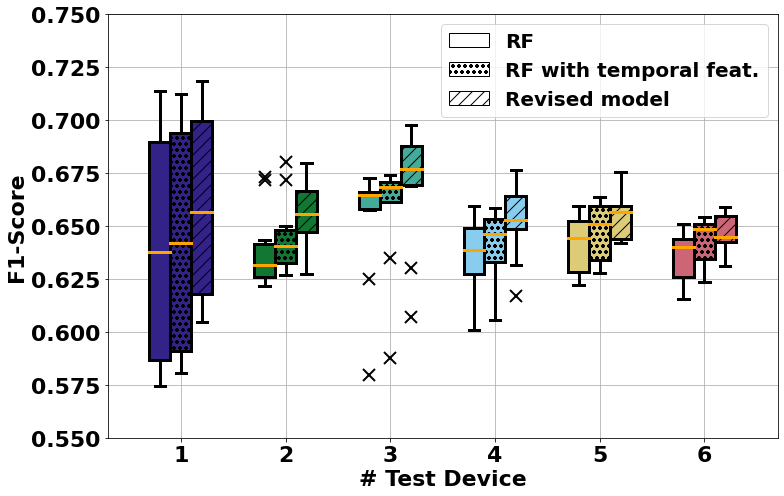

In [5]:
#Delhi (a)
df_rf_old=pd.read_csv("./logs/exp/delhi_rf_old_varryDiv.csv") #fix this to run
df_rf=pd.read_csv("./logs/exp/delhi_rf_varryDiv.csv")
df_rnn=pd.read_csv("./logs/exp/delhi_rnn_varryDiv.csv") #fix this to rnn

groups_rf_old=df_rf_old.groupby('num_test_dev')['f1_score_test']
groups_rf=df_rf.groupby('num_test_dev')['f1_score_test']
groups_rnn=df_rnn.groupby('num_test_dev')['f1_score_test']

fig, ax = plt.subplots(figsize=figsize)
for i in groups_rf.groups.keys():
    bp0=\
    ax.boxplot([groups_rf_old.get_group(i)],
               positions=[i-0.2],
               widths=[0.2],
               showfliers=True,notch=False,patch_artist=True, boxprops=dict(linewidth=linewidth-1,color='black',
                                                                            facecolor=color[i-1]),
               whiskerprops = dict(linestyle='-',linewidth=linewidth-1, color='black'),
               capprops=dict(linestyle='-',linewidth=linewidth-1, color='black'),
               medianprops=dict(linestyle='-',linewidth=linewidth-1, color='orange'),
               flierprops=dict(marker='x',markeredgecolor="k",markersize=12,markeredgewidth=2))
    
    bp1=\
    ax.boxplot([groups_rf.get_group(i)],
               positions=[i],
               widths=[0.2],
               showfliers=True,notch=False,patch_artist=True, boxprops=dict(linewidth=linewidth-1,color='black',
                                                                            facecolor=color[i-1]),
               whiskerprops = dict(linestyle='-',linewidth=linewidth-1, color='black'),
               capprops=dict(linestyle='-',linewidth=linewidth-1, color='black'),
               medianprops=dict(linestyle='-',linewidth=linewidth-1, color='orange'),
               flierprops=dict(marker='x',markeredgecolor="k",markersize=12,markeredgewidth=2))
    bp2=\
    ax.boxplot([groups_rnn.get_group(i)],
               positions=[i+0.2],
               widths=[0.2],
               showfliers=True,notch=False,patch_artist=True, boxprops=dict(linewidth=linewidth-1,color='black',
                                                                            facecolor=color[i-1]),
               whiskerprops = dict(linestyle='-',linewidth=linewidth-1, color='black'),
               capprops=dict(linestyle='-',linewidth=linewidth-1, color='black'),
               medianprops=dict(linestyle='-',linewidth=linewidth-1, color='orange'),
               flierprops=dict(marker='x',markeredgecolor="k",markersize=12,markeredgewidth=2))
   
    for box in bp1['boxes']:
        box.set(hatch = 'oo')
    for box in bp2['boxes']:
        box.set(hatch = '//')

ax.set_xlabel("# Test Device",fontsize=fontsize, fontweight='bold')
ax.set_ylabel("F1-Score",fontsize=fontsize, fontweight='bold')
ax.set_ylim(0.55,0.75)
ax.set_xticks(list(groups_rf.groups.keys()))
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=fontsize, fontweight='bold')
plt.yticks(fontsize=fontsize, fontweight='bold')

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper right',prop=dict(size=fontsize-2,weight="bold"))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_varryDiv.png")

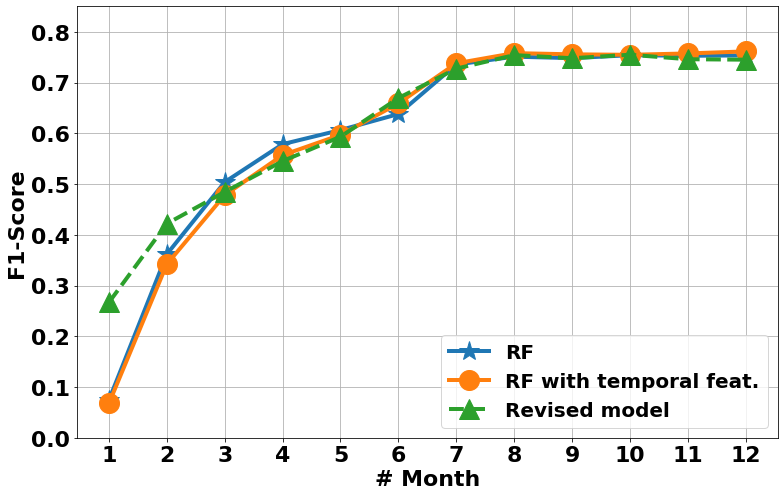

In [6]:
#Durgapur (b)-1
rf_old_1by1=pd.read_csv("./logs/exp/dgp_rf_old_month_1by1.csv")['f1_score_test']
rf_1by1=pd.read_csv("./logs/exp/dgp_rf_month_1by1.csv")['f1_score_test']
rnn_1by1=pd.read_csv("./logs/exp/dgp_rnn_month_1by1.csv")['f1_score_test']

fig=plt.figure(figsize=figsize)
ax=fig.add_subplot(111)
#RF OLD
ax.plot(rf_old_1by1.index+1,rf_old_1by1,marker="*",linestyle="-",label="RF",markersize=20,
        linewidth=linewidth)
#RF
ax.plot(rf_1by1.index+1,rf_1by1,marker="o",linestyle="-",label="RF with temporal feat.",markersize=20,
        linewidth=linewidth)
#RNN
ax.plot(rnn_1by1.index+1,rnn_1by1,marker="^",linestyle="--",label="Revised model",markersize=20,
        linewidth=linewidth) 
plt.ylim(0,0.85)
plt.yticks(fontsize=fontsize,fontweight="bold")
plt.xticks([i for i in range(1,13)],fontsize=fontsize,fontweight="bold")
ax.set_xticklabels([i for i in range(1,13)])
ax.set_xlabel("# Month",fontsize=fontsize,fontweight="bold")
ax.set_ylabel("F1-Score",fontsize=fontsize,fontweight="bold")
ax.legend(loc='lower right',prop=dict(size=fontsize-2,weight="bold"))
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_1by1.png")

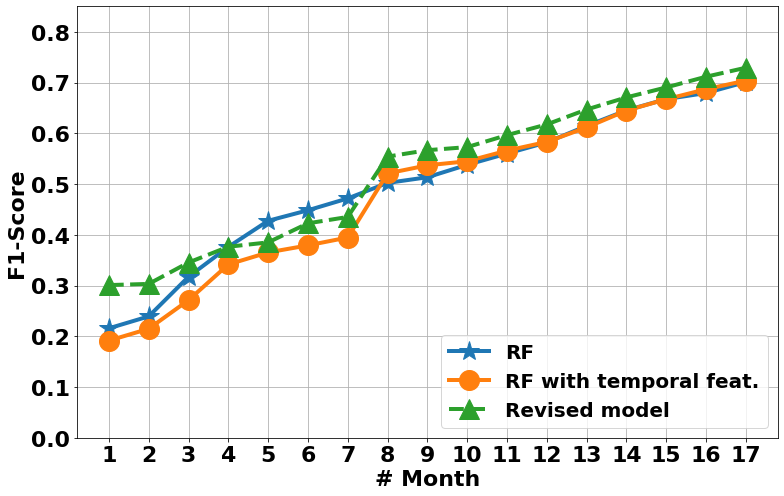

In [7]:
#Delhi (b)-2
rf_old_1by1=pd.read_csv("./logs/exp/delhi_rf_old_month_1by1.csv")['f1_score_test']
rf_1by1=pd.read_csv("./logs/exp/delhi_rf_month_1by1.csv")['f1_score_test']
rnn_1by1=pd.read_csv("./logs/exp/delhi_rnn_month_1by1.csv")['f1_score_test']

fig=plt.figure(figsize=figsize)
ax=fig.add_subplot(111)
#RF OLD
ax.plot(rf_old_1by1.index+1,rf_old_1by1,marker="*",linestyle="-",label="RF",markersize=20,
        linewidth=linewidth)
#RF
ax.plot(rf_1by1.index+1,rf_1by1,marker="o",linestyle="-",label="RF with temporal feat.",markersize=20,
        linewidth=linewidth)
#RNN
ax.plot(rnn_1by1.index+1,rnn_1by1,marker="^",linestyle="--",label="Revised model",markersize=20,
        linewidth=linewidth) 
plt.ylim(0,0.85)
plt.yticks(fontsize=fontsize,fontweight="bold")
plt.xticks([i for i in range(1,18)],fontsize=fontsize,fontweight="bold")
ax.set_xticklabels([i for i in range(1,18)])
ax.set_xlabel("# Month",fontsize=fontsize,fontweight="bold")
ax.set_ylabel("F1-Score",fontsize=fontsize,fontweight="bold")
ax.legend(loc='lower right',prop=dict(size=fontsize-2,weight="bold"))
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_1by1.png")

In [8]:
#NICE

In [9]:
from library.models.rnn import RNN
from library.constants import epochs,batch_size
from library.models.rf import RandomForest,OldRandomForest
from library.experiments import experiment,datasplit_experiment
from IPython.display import clear_output

def classwise_F1_score_and_conf_met(model):
    y_true = model.y_test
    y_pred = model.pred_fn(model.X_test)
    labels = [0, 1, 2, 3, 4]

    f1_scores = f1_score(y_true, y_pred, average=None, labels=labels)
    f1_scores_with_labels = {label:score for label,score in zip(labels, f1_scores)}
    conf_met=confusion_matrix(y_true,y_pred)
    return f1_scores_with_labels,conf_met

In [10]:
#Durgapur

city="Dgp"
restore=True

old_rf_model_fn=lambda path=None,restore=False: OldRandomForest()
rf_model_fn=lambda path=None,restore=False: RandomForest()
rnn_model_fn=lambda path='./logs/model/checkpoint',restore=False: RNN(checkpoint_filepath=path,restore=restore)

def datasplit_experiment(exp_name,city,model_fn,test_size=0.3,epochs=None,batch_size=None,restore=False):
    save_pattern=city+"_"+exp_name
    model=model_fn(path='./logs/model/'+save_pattern,restore=restore)
    fig=model.train_on_files(f"./Data/{city}/*",test_size=test_size,epochs=epochs,batch_size=batch_size)
    return model

rf_old=datasplit_experiment("split_rf_old",city,old_rf_model_fn,test_size=0.3,
                            epochs=epochs,batch_size=batch_size,restore=restore)
rf=datasplit_experiment("split_rf",city,rf_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)
rnn=datasplit_experiment("split_rnn",city,rnn_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)

clear_output()
rnn_f1,rnn_conf=classwise_F1_score_and_conf_met(rnn)
rf_f1,rf_conf=classwise_F1_score_and_conf_met(rf)
rf_old_f1,rf_old_conf=classwise_F1_score_and_conf_met(rf_old)

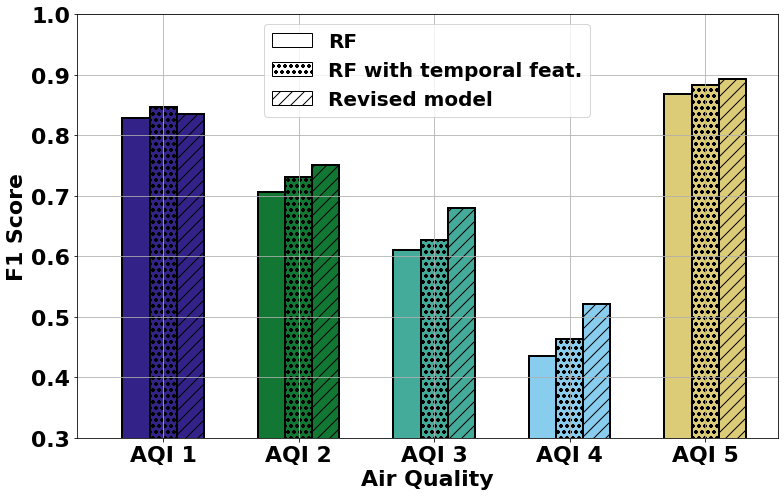

In [11]:
fig, ax = plt.subplots(figsize=figsize)
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_f1.values(), #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

ax.set_ylim(0.3,1.0)

ax.set_xlabel("Air Quality",fontsize=fontsize, fontweight='bold')
ax.set_ylabel("F1 Score",fontsize=fontsize, fontweight='bold')

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=fontsize, fontweight='bold')
plt.yticks(fontsize=fontsize, fontweight='bold')

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper center',prop=dict(size=fontsize-2,weight="bold"))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_aqi.png")

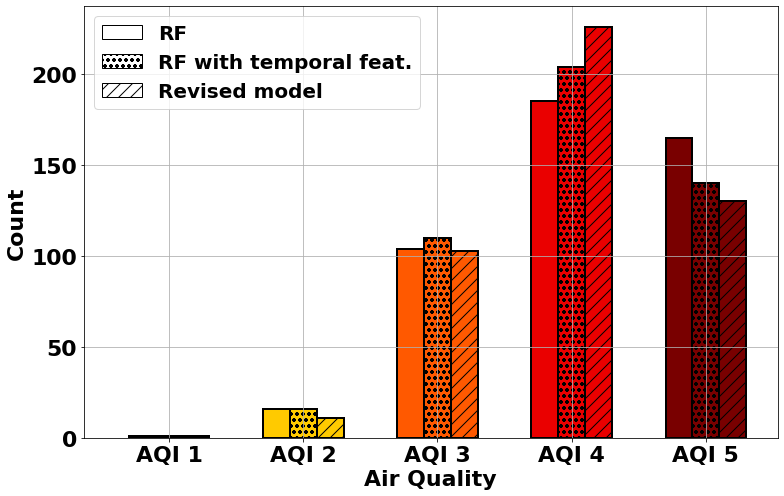

In [12]:
color_red=sns.color_palette('hot_r',5)

fig, ax = plt.subplots(figsize=figsize)
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=linewidth-2,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_conf[3,:], #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#ax.set_ylim(0.3,1.0)

ax.set_xlabel("Air Quality",fontsize=fontsize, fontweight='bold')
ax.set_ylabel("Count",fontsize=fontsize, fontweight='bold')

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=fontsize, fontweight='bold')
plt.yticks(fontsize=fontsize, fontweight='bold')

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper left',prop=dict(size=fontsize-2,weight="bold"))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/dgp_aqi4_miss.png")

In [13]:
#Delhi

city="Delhi"
restore=True

old_rf_model_fn=lambda path=None,restore=False: OldRandomForest()
rf_model_fn=lambda path=None,restore=False: RandomForest()
rnn_model_fn=lambda path='./logs/model/checkpoint',restore=False: RNN(checkpoint_filepath=path,restore=restore)

def datasplit_experiment(exp_name,city,model_fn,test_size=0.3,epochs=None,batch_size=None,restore=False):
    save_pattern=city+"_"+exp_name
    model=model_fn(path='./logs/model/'+save_pattern,restore=restore)
    fig=model.train_on_files(f"./Data/{city}/*",test_size=test_size,epochs=epochs,batch_size=batch_size)
    return model

rf_old=datasplit_experiment("split_rf_old",city,old_rf_model_fn,test_size=0.3,
                            epochs=epochs,batch_size=batch_size,restore=restore)
rf=datasplit_experiment("split_rf",city,rf_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)
rnn=datasplit_experiment("split_rnn",city,rnn_model_fn,test_size=0.3,
                        epochs=epochs,batch_size=batch_size,restore=restore)

clear_output()
rnn_f1,rnn_conf=classwise_F1_score_and_conf_met(rnn)
rf_f1,rf_conf=classwise_F1_score_and_conf_met(rf)
rf_old_f1,rf_old_conf=classwise_F1_score_and_conf_met(rf_old)

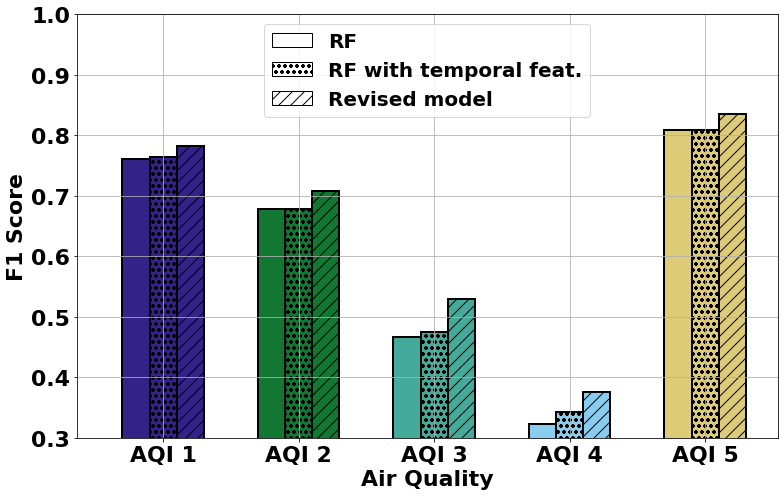

In [14]:
fig, ax = plt.subplots(figsize=figsize)
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_f1.values(),align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_f1.values(), #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

ax.set_ylim(0.3,1.0)

ax.set_xlabel("Air Quality",fontsize=fontsize, fontweight='bold')
ax.set_ylabel("F1 Score",fontsize=fontsize, fontweight='bold')

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=fontsize, fontweight='bold')
plt.yticks(fontsize=fontsize, fontweight='bold')

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper center',prop=dict(size=fontsize-2,weight="bold"))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_aqi.png")

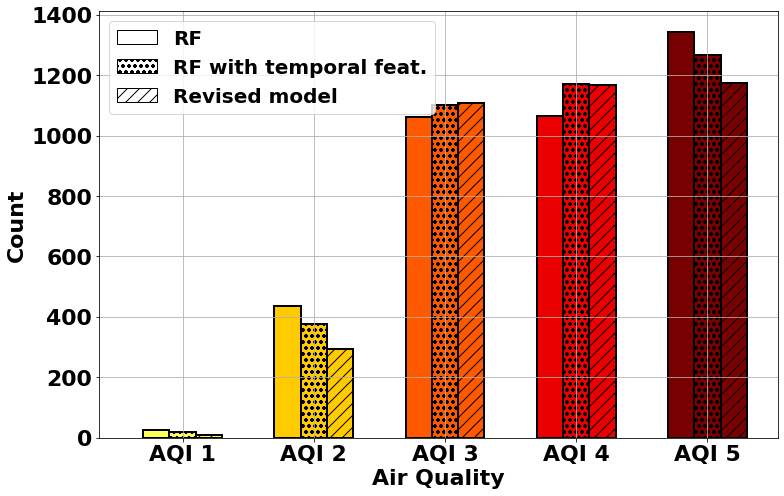

In [15]:
color_red=sns.color_palette('hot_r',5)

fig, ax = plt.subplots(figsize=figsize)
#RF OLD
ax.bar(x=np.array([1,2,3,4,5])-0.2,height=rf_old_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=linewidth-2,
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#RF
ax.bar(x=np.array([1,2,3,4,5]),height=rf_conf[3,:],align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='oo',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))
#RNN
ax.bar(x=np.array([1,2,3,4,5])+0.2,height=rnn_conf[3,:], #GP
       align='center', alpha=1, ecolor='k',
       capsize=10,color=color_red,
       width=0.2,ec='k',linewidth=linewidth-2,hatch='//',
       error_kw =dict(linestyle='-',linewidth=linewidth-1, color='black',markeredgewidth=linewidth-1))

#ax.set_ylim(0.3,1.0)

ax.set_xlabel("Air Quality",fontsize=fontsize, fontweight='bold')
ax.set_ylabel("Count",fontsize=fontsize, fontweight='bold')

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([f'AQI {i}' for i in range(1,6)],fontsize=fontsize, fontweight='bold')
plt.yticks(fontsize=fontsize, fontweight='bold')

#LEGEND######
plt.bar([1],[0],label='RF',color='white',ec='k')
plt.bar([1],[0],label='RF with temporal feat.',color='white',ec='k',hatch='oo')
plt.bar([1],[0],label='Revised model',color='white',ec='k',hatch='//')
plt.legend(loc='upper left',prop=dict(size=fontsize-2,weight="bold"))

plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/delhi_aqi4_miss.png")

In [1]:
import numpy as np
import pandas as pd
from library.constants import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

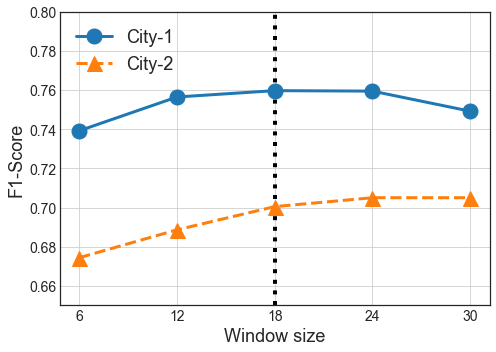

In [2]:
#Window size
rnn_dgp=pd.read_csv("./logs/exp/Dgp_window_size.csv")['f1_score_test']
rnn_delhi=pd.read_csv("./logs/exp/Delhi_window_size.csv")['f1_score_test']
ma=0.705

fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
#DGP
ax.plot(rnn_dgp.index+1,rnn_dgp,marker="o",linestyle="-",label="City-1",markersize=15,
        linewidth=3)
#DELHI
ax.plot(rnn_delhi.index+1,np.clip(rnn_delhi,0,ma),marker="^",linestyle="--",label="City-2",markersize=15,
        linewidth=3) 

#VLINE
ax.vlines(x=3,ymin=0.65,ymax=0.80,linestyles='dotted',linewidth=4,color='k')

plt.ylim(0.65,0.80)
plt.yticks(fontsize=14)
plt.xticks([1,2,3,4,5],fontsize=14)
ax.set_xticklabels([6,12,18,24,30])
ax.set_xlabel("Window size",fontsize=18)
ax.set_ylabel("F1-Score",fontsize=18)
ax.legend(loc='upper left',prop=dict(size=18))
plt.tight_layout()
plt.grid()
fig.savefig("./logs/figs/window_size.png")

In [3]:
#NICE